In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN





In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'}, inplace=True)
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
df

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


<Figure size 800x600 with 0 Axes>

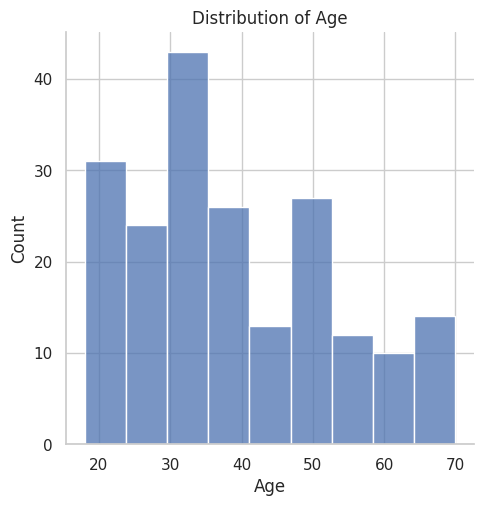

In [ ]:
plt.figure(figsize=(8,6))
sns.set(style = 'whitegrid')
sns.displot(x=df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(17.31944444444445, 0.5, 'Count')

<Figure size 800x600 with 0 Axes>

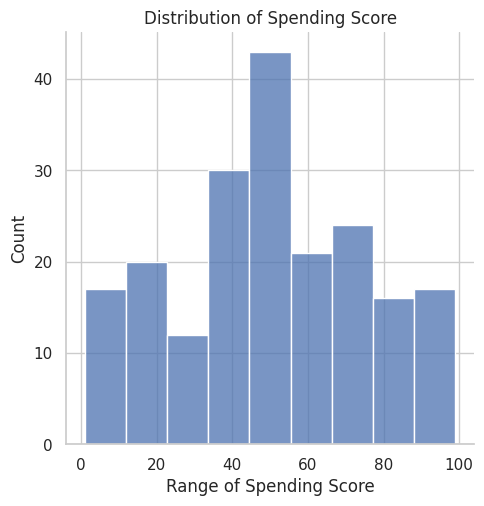

In [ ]:
#Distribution of Spending Score
plt.figure(figsize=(8, 6))
sns.set(style = 'whitegrid')
sns.displot(df['Spending Score'])
plt.title('Distribution of Spending Score', fontsize = 12)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')


Text(17.31944444444445, 0.5, 'Count')

<Figure size 800x600 with 0 Axes>

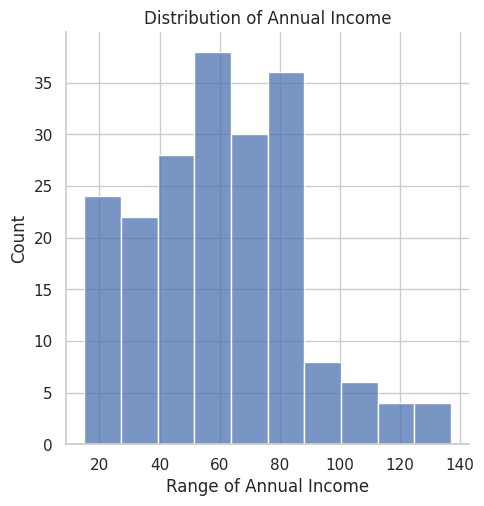

In [ ]:
#Distribution of Annual Income
plt.figure(figsize=(8, 6))
sns.set(style = 'whitegrid')
sns.displot(df['Annual Income'])
plt.title('Distribution of Annual Income', fontsize = 12)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

<ipython-input-23-1fe97c32ad35>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')


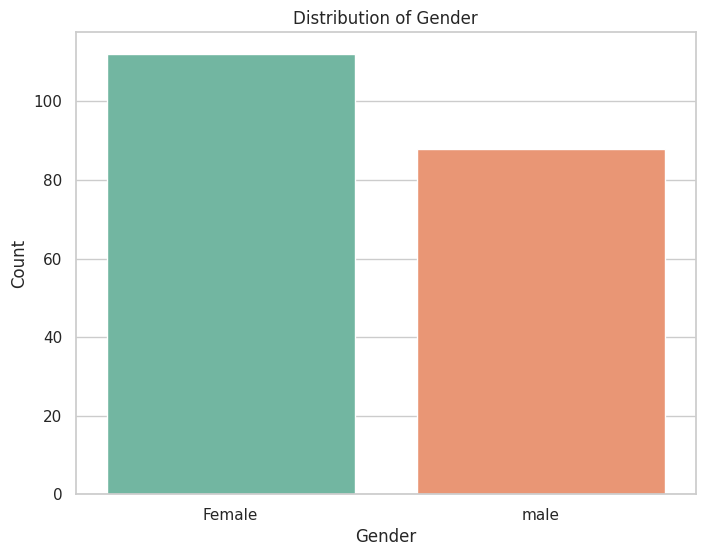

In [ ]:
# Calculate gender counts
gender_counts = df['Gender'].value_counts()
#male_df = df[df['Gender'] == 1]
#female_df = df[df['Gender'] == 0]
# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
plt.xticks(ticks=[0, 1], labels=['Female', 'male'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
df.groupby('Gender').mean()


,Age,Annual Income,Spending Score
Gender,,,
0,38.098214,59.250000,51.526786
1,39.806818,62.227273,48.511364


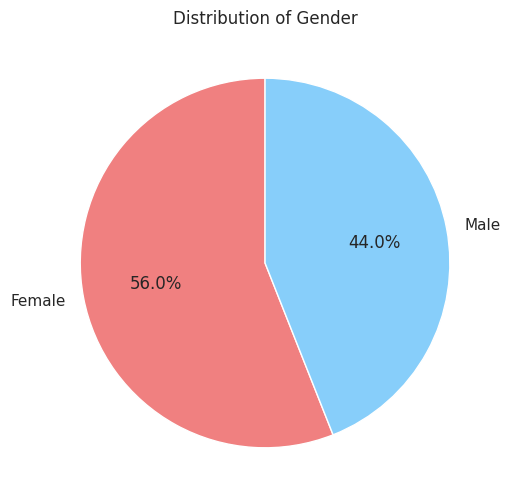

In [ ]:


# Calculate gender counts
gender_counts = df['Gender'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts.values, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Gender')
plt.show()


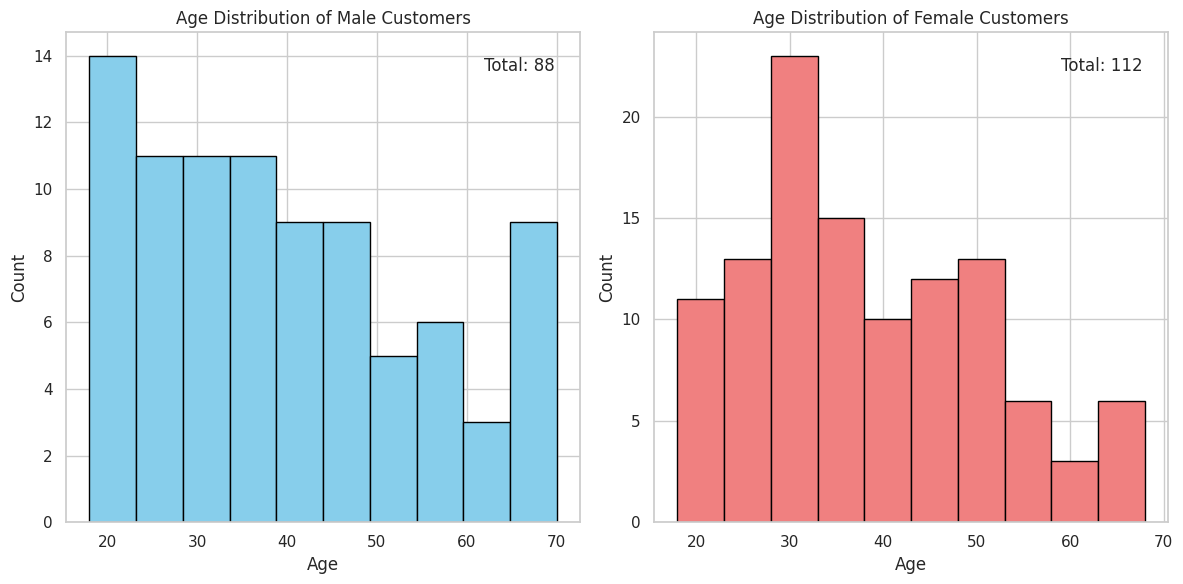

In [ ]:

# Create separate DataFrames for male and female customers
male_df = df[df['Gender'] == 1]
female_df = df[df['Gender'] == 0]

# Plot histograms for male and female age distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(male_df['Age'], bins=10, edgecolor='black', color='skyblue')
sns.set(style = 'whitegrid')
plt.title('Age Distribution of Male Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.text(0.95, 0.95, f'Total: {len(male_df)}', transform=plt.gca().transAxes, ha='right', va='top')

plt.subplot(1, 2, 2)
plt.hist(female_df['Age'], bins=10, edgecolor='black', color='lightcoral')
sns.set(style = 'whitegrid')
plt.title('Age Distribution of Female Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.text(0.95, 0.95, f'Total: {len(female_df)}', transform=plt.gca().transAxes, ha='right', va='top')

plt.tight_layout()
plt.show()


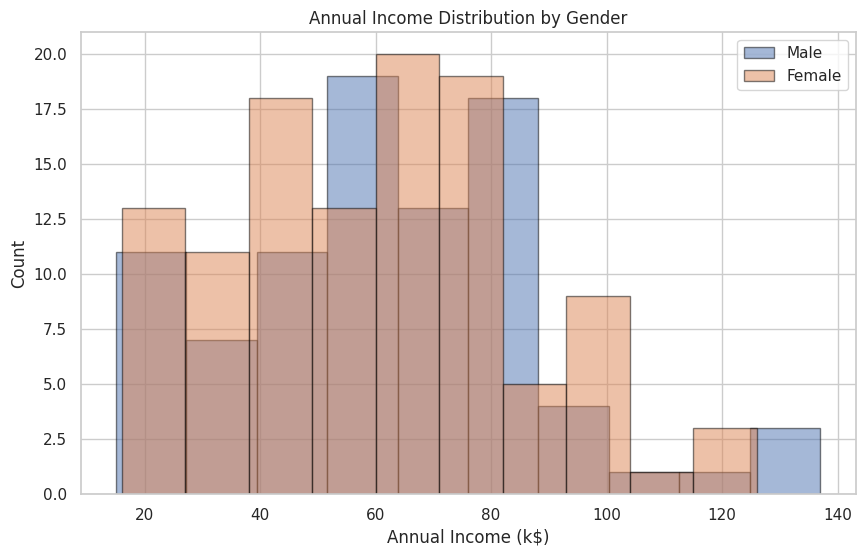

In [ ]:

# Create separate DataFrames for male and female customers
male_df = df[df['Gender'] == 1]
female_df = df[df['Gender'] == 0]

# Plot histograms for male and female income distributions in a single graph
plt.figure(figsize=(10, 6))
plt.hist(male_df['Annual Income'], bins=10, alpha=0.5, label='Male', edgecolor='black')
plt.hist(female_df['Annual Income'], bins=10, alpha=0.5, label='Female', edgecolor='black')
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.legend()
plt.show()


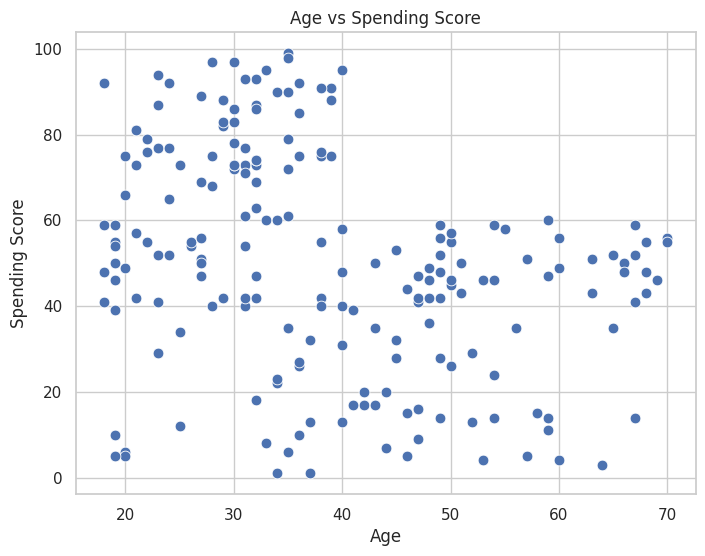

In [ ]:
# Age vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Age' , y = 'Spending Score', data= df,s = 60)
plt.xlabel('Age'), plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()

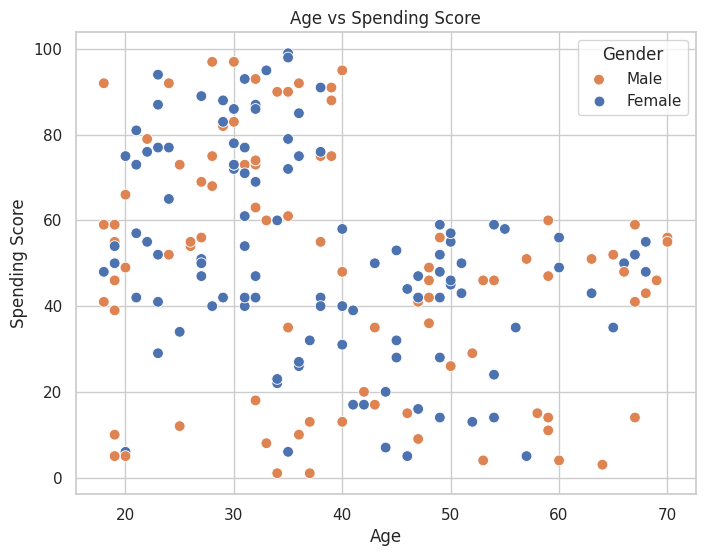

In [ ]:
# Age vs Spending Score based on gender
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Age' , y = 'Spending Score',hue="Gender", data = df  ,s = 60)
plt.xlabel('Age'), plt.ylabel('Spending Score')
plt.title('Age vs Spending Score based on Gender')
plt.title('Age vs Spending Score')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

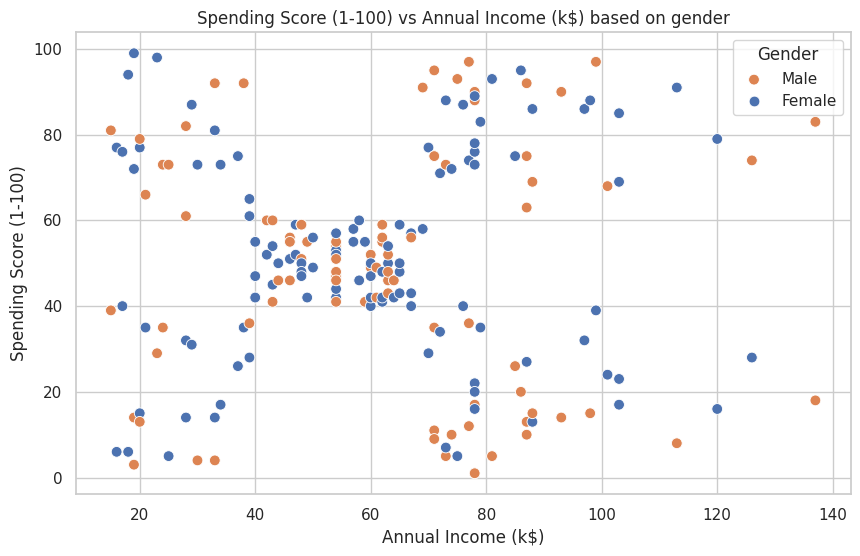

In [ ]:
# Annual Income vs Spending Score based on gender
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income',y = 'Spending Score' , hue="Gender",data = df  ,s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$) based on gender')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

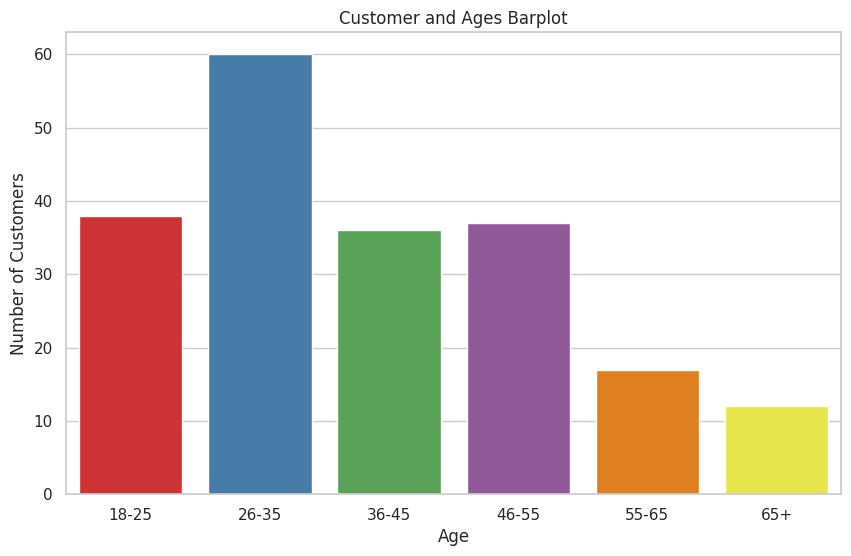

In [ ]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age56_65 =  df.Age[(df.Age >= 56) & (df.Age <= 65)]
age65_above=df.Age[df.Age >= 66]

age = ["18-25","26-35","36-45","46-55","55-65","65+"]
age_count = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65.values),len(age65_above.values)]
# colors = ['red', 'green', 'blue', 'yellow', 'brown']

plt.figure(figsize=(10,6))
sns.barplot(x=age, y=age_count, hue=age, palette='Set1', legend=False)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

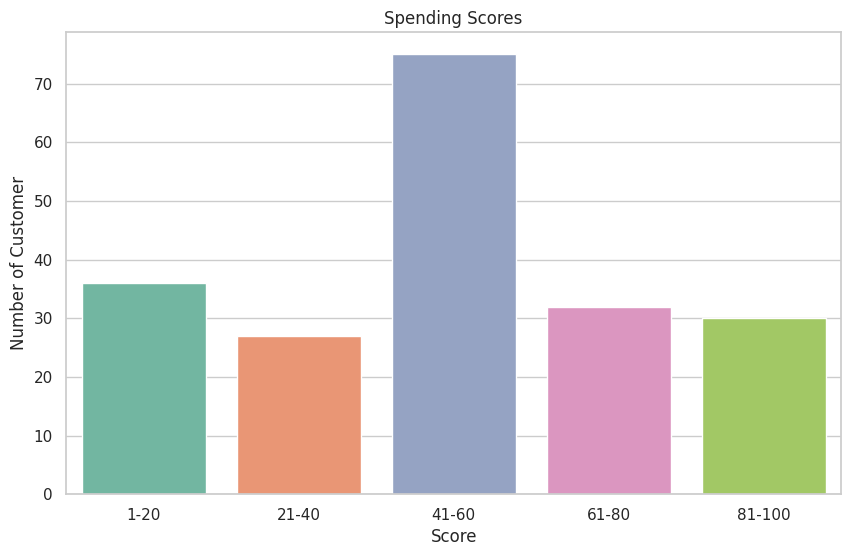

In [ ]:
ss1_20 = df["Spending Score"][(df["Spending Score"] >= 1) & (df["Spending Score"] <= 20)]
ss21_40 = df["Spending Score"][(df["Spending Score"] >= 21) & (df["Spending Score"] <= 40)]
ss41_60 = df["Spending Score"][(df["Spending Score"] >= 41) & (df["Spending Score"] <= 60)]
ss61_80 = df["Spending Score"][(df["Spending Score"] >= 61) & (df["Spending Score"] <= 80)]
ss81_100 = df["Spending Score"][(df["Spending Score"] >= 81) & (df["Spending Score"] <= 100)]

score = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_count = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score, y=score_count, hue=score, palette="Set2", legend=False)
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer")
plt.show()

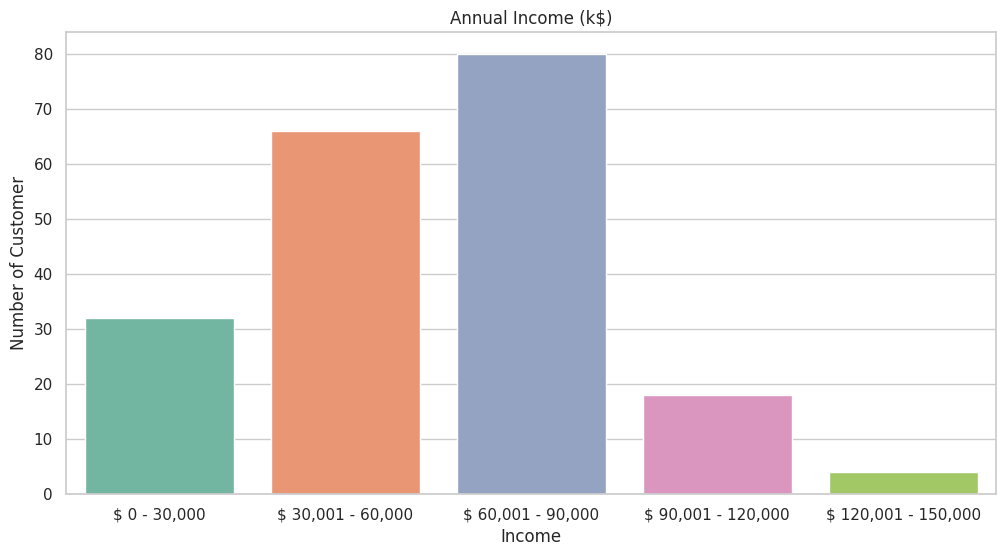

In [ ]:
ai0_30 = df["Annual Income"][(df["Annual Income"] >= 0) & (df["Annual Income"] <= 30)]
ai31_60 = df["Annual Income"][(df["Annual Income"] >= 31) & (df["Annual Income"] <= 60)]
ai61_90 = df["Annual Income"][(df["Annual Income"] >= 61) & (df["Annual Income"] <= 90)]
ai91_120 = df["Annual Income"][(df["Annual Income"] >= 91) & (df["Annual Income"] <= 120)]
ai121_150 = df["Annual Income"][(df["Annual Income"] >= 121) & (df["Annual Income"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=income_x, y=income_y, hue=income_x, palette="Set2", legend=False)
plt.title("Annual Income (k$)")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# KMEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

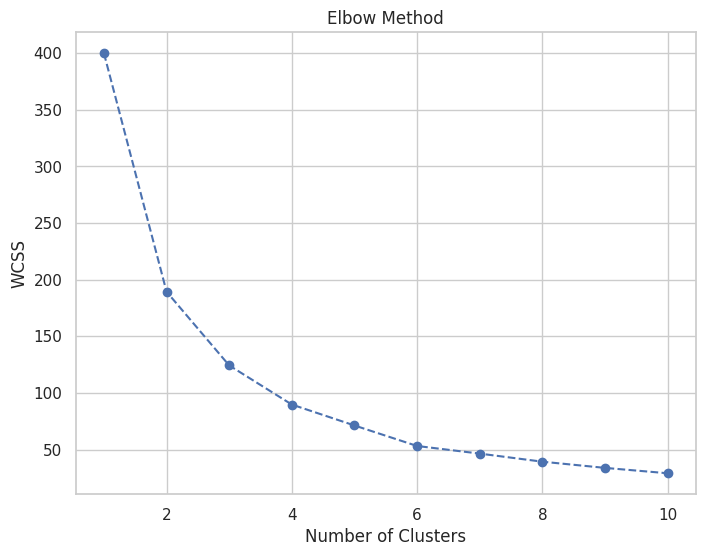

In [ ]:
# Selecting features for clustering
X = df.iloc[:, [ 1, 3]].values  # Age, Spending Score

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means_Age_spending_silhouette_score:  0.44754858878462783


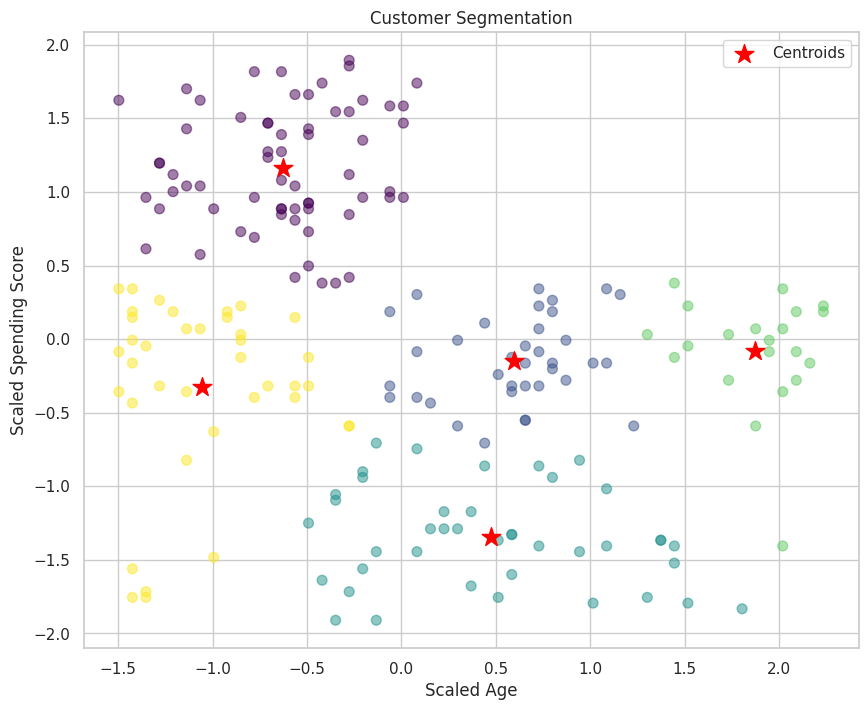

In [ ]:
# Applying K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, clusters)
print("K-Means_Age_spending_silhouette_score: ", score)

# Adding cluster labels to the dataset
df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

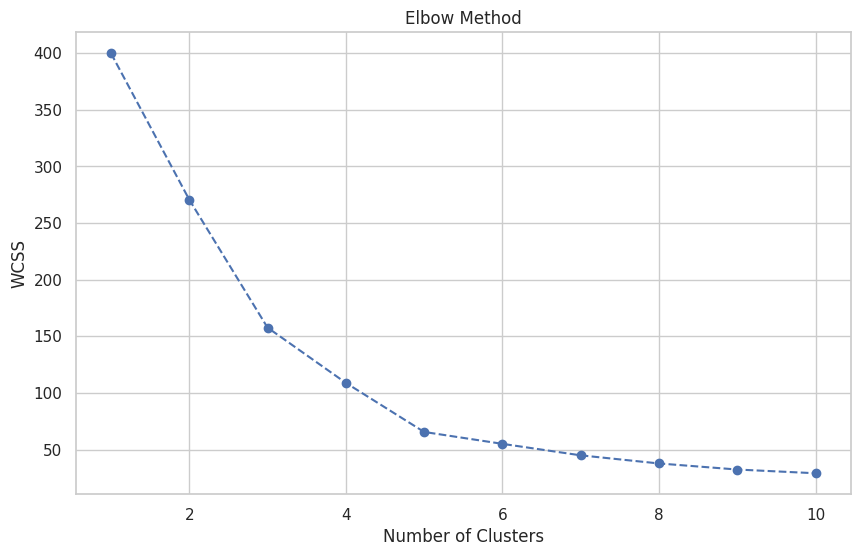

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means_Annual_spending_silhouette_score:  0.5546571631111091


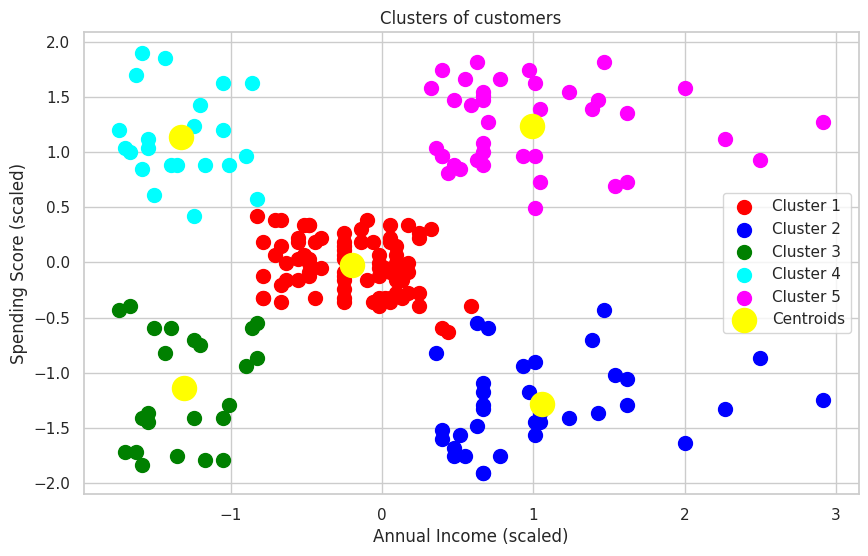

In [ ]:
# Selecting features for clustering
X = df.iloc[:, [2, 3]].values  # Age and Spending Score

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow method, let's choose 5 clusters

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, y_kmeans)
print("K-Means_Annual_spending_silhouette_score: ", score)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


# DBSCAN

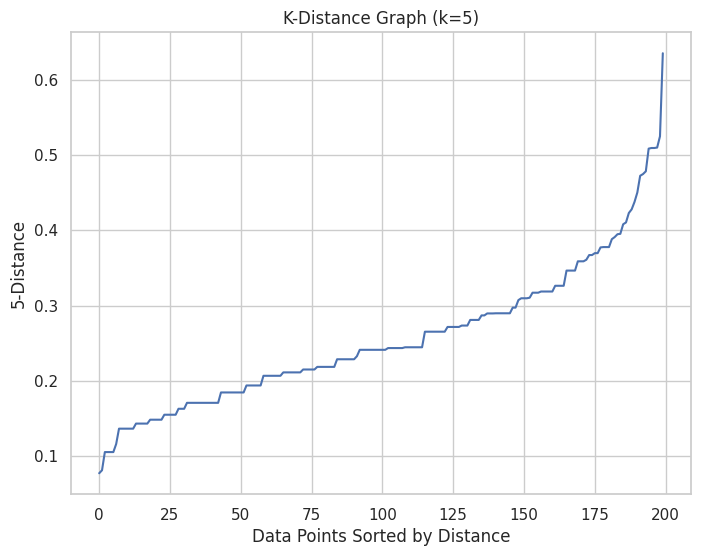

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

X = df[['Age', 'Spending Score']].values


# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot k-distance graph
def plot_k_distance_graph(X_scaled, k=5):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
    distances, _ = nbrs.kneighbors(X_scaled)
    k_distances = np.sort(distances[:, k-1])#,axis=0)

    plt.figure(figsize=(8, 6))
    plt.plot(k_distances)
    plt.title(f'K-Distance Graph (k={k})')
    plt.xlabel('Data Points Sorted by Distance')
    plt.ylabel(f'{k}-Distance')
    plt.grid(True)
    plt.show()

# Plot k-distance graph to find a good epsilon value
plot_k_distance_graph(X_scaled, k=5)

#


Enter the optimal eps value based on the k-Distance Graph: 0.4
DBSCAN_silhouette_score:  0.2429242944420529


<ipython-input-38-ff64580ef0f8>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


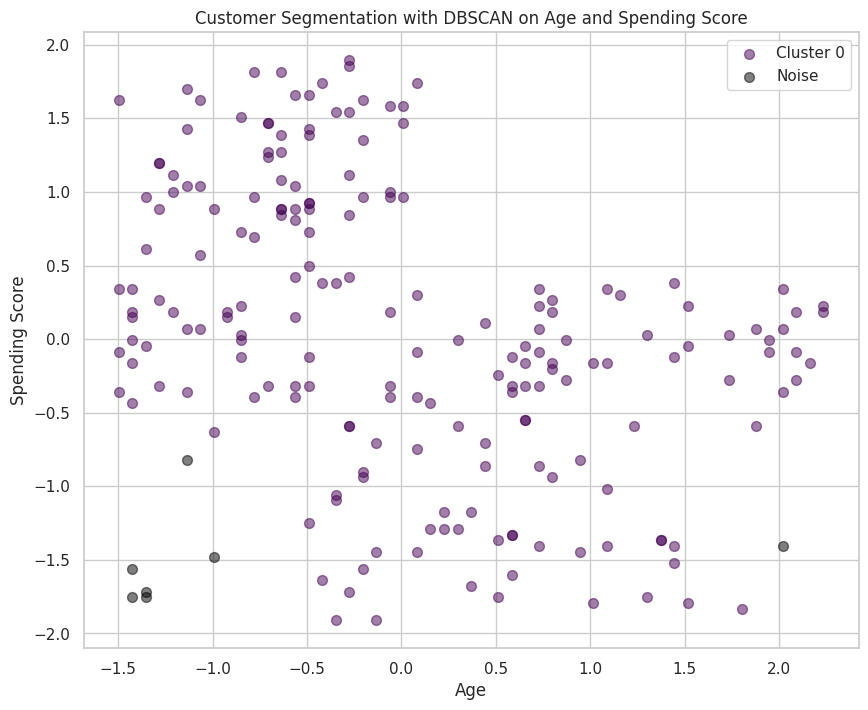

In [ ]:
#Function to apply DBSCAN and plot clusters
def apply_dbscan(X_scaled, epsilon, min_samples):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_scaled)
# Check if there is more than one unique cluster label
    # Handle cases where DBSCAN labels some points as noise (-1)
    if len(set(clusters)) > 1:  # Check if there are more than one cluster (excluding noise)
        score = silhouette_score(X_scaled, clusters) if len(set(clusters)) > 1 else "undefined"
            # If only one cluster (or all points are noise), set the score to "undefined"
    else:
        score = "undefined"

    print(f"DBSCAN_silhouette_score: ", score)

    # Visualizing the clusters
    plt.figure(figsize=(10, 8))
    unique_labels = set(clusters)
    colors = plt.cm.get_cmap('viridis', len(unique_labels))

    for label in unique_labels:
        if label == -1:  # Noise
            plt.scatter(X_scaled[clusters == label, 0], X_scaled[clusters == label, 1], c='black', label='Noise', s=50, alpha=0.5)
        else:
            plt.scatter(X_scaled[clusters == label, 0], X_scaled[clusters == label, 1], c=[colors(label)], label=f'Cluster {label}', s=50, alpha=0.5)

    plt.title('Customer Segmentation with DBSCAN on Age and Spending Score')
    plt.xlabel('Age')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

    return clusters

# Apply DBSCAN with chosen epsilon and min_samples
eps = float(input("Enter the optimal eps value based on the k-Distance Graph: "))  # Adjust based on k-distance graph
#epsilon=0.5
min_samples= 5  # Adjust based on domain knowledge or experimentation
clusters = apply_dbscan(X_scaled, eps, min_samples)

# Adding cluster labels to the dataset
df['DBSCAN_Cluster'] = clusters

# Saving the updated dataframe
df.to_csv('mall_customer_with_clusters.csv', index=False)

In [ ]:
df

,Gender,Age,Annual Income,Spending Score,Cluster,DBSCAN_Cluster
0,1,19,15,39,4,0
1,1,21,15,81,0,0
2,0,20,16,6,4,-1
3,0,23,16,77,0,0
4,0,31,17,40,4,0
...,...,...,...,...,...,...
195,0,35,120,79,0,0
196,0,45,126,28,2,0
197,1,32,126,74,0,0
198,1,32,137,18,2,0


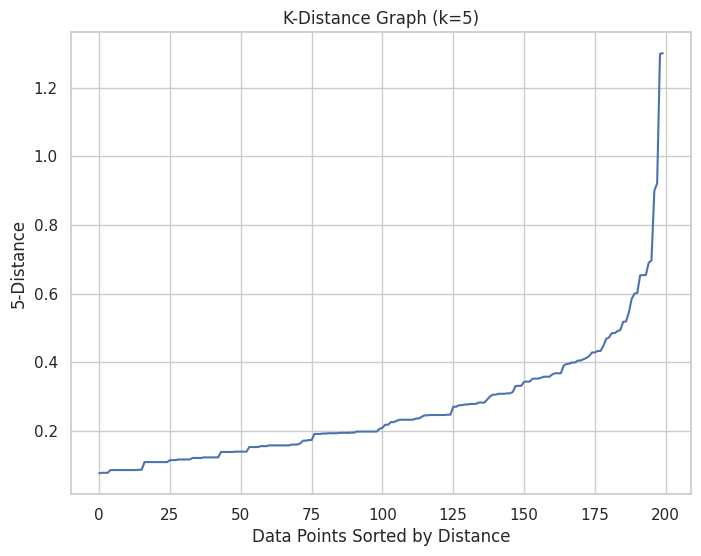

In [ ]:
X = df[['Spending Score','Annual Income']].values


# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot k-distance graph
def plot_k_distance_graph(X_scaled, k=5):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
    distances, _ = nbrs.kneighbors(X_scaled)
    k_distances = np.sort(distances[:, k-1], axis=0)

    plt.figure(figsize=(8, 6))
    plt.plot(k_distances)
    plt.title(f'K-Distance Graph (k={k})')
    plt.xlabel('Data Points Sorted by Distance')
    plt.ylabel(f'{k}-Distance')
    plt.grid(True)
    plt.show()

# Plot k-distance graph to find a good epsilon value
plot_k_distance_graph(X_scaled, k=5)


Enter the optimal eps value based on the k-Distance Graph: 0.4
DBSCAN_silhouette_score:  0.41325830390002166


<ipython-input-41-402b73dc8f94>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


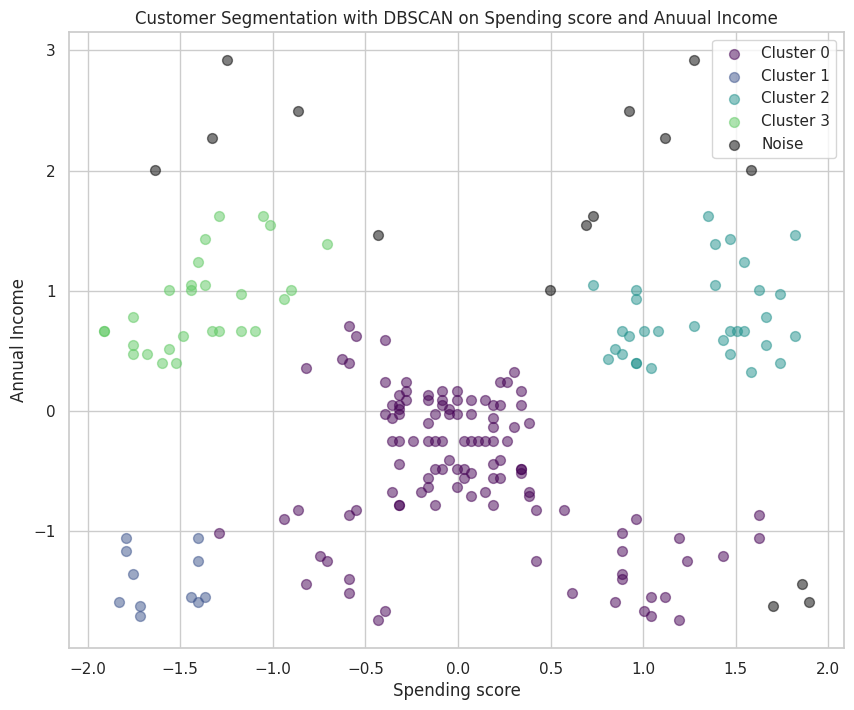

In [ ]:
def apply_dbscan(X_scaled, epsilon, min_samples):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_scaled)

    # Handle cases where DBSCAN labels some points as noise (-1)
    if len(set(clusters)) > 1:  # Check if there are more than one cluster (excluding noise)
        score = silhouette_score(X_scaled, clusters) if len(set(clusters)) > 1 else "undefined"
    else:
        score = "undefined"

    print(f"DBSCAN_silhouette_score: ", score)

    # Visualizing the clusters
    plt.figure(figsize=(10, 8))
    unique_labels = set(clusters)
    colors = plt.cm.get_cmap('viridis', len(unique_labels))

    for label in unique_labels:
        if label == -1:  # Noise
            plt.scatter(X_scaled[clusters == label, 0], X_scaled[clusters == label, 1], c='black', label='Noise', s=50, alpha=0.5)
        else:
            plt.scatter(X_scaled[clusters == label, 0], X_scaled[clusters == label, 1], c=[colors(label)], label=f'Cluster {label}', s=50, alpha=0.5)

    plt.title('Customer Segmentation with DBSCAN on Spending score and Anuual Income')
    plt.xlabel('Spending score')
    plt.ylabel('Annual Income')
    plt.legend()
    plt.show()

    return clusters

# Apply DBSCAN with chosen epsilon and min_samples
epsilon = float(input("Enter the optimal eps value based on the k-Distance Graph: "))  # Adjust based on k-distance graph
#epsilon=0.5
min_samples = 5  # Adjust based on domain knowledge or experimentation
clusters = apply_dbscan(X_scaled, epsilon, min_samples)

# Adding cluster labels to the dataset
df['DBSCAN_Cluster'] = clusters

# Saving the updated dataframe
df.to_csv('mall_customer_with_clusters.csv', index=False)

In [ ]:
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)


           Gender        Age  Annual Income  Spending Score  DBSCAN_Cluster
Cluster                                                                    
0        0.437500  30.140625      63.750000       80.156250        0.843750
1        0.333333  47.138889      57.250000       46.444444       -0.027778
2        0.463415  45.439024      69.390244       15.536585        1.804878
3        0.619048  64.952381      51.523810       48.142857        0.047619
4        0.421053  24.131579      53.789474       41.842105        0.342105
